In [63]:
from io import StringIO
import glob
import random
import re
import pandas as pd
from PIL import Image
import pytesseract

In [67]:
!pwd

/home/alex/work/notebooks


In [7]:
files = glob.glob('/home/alex/work/gimages_dataset/binance btc deposit/*')

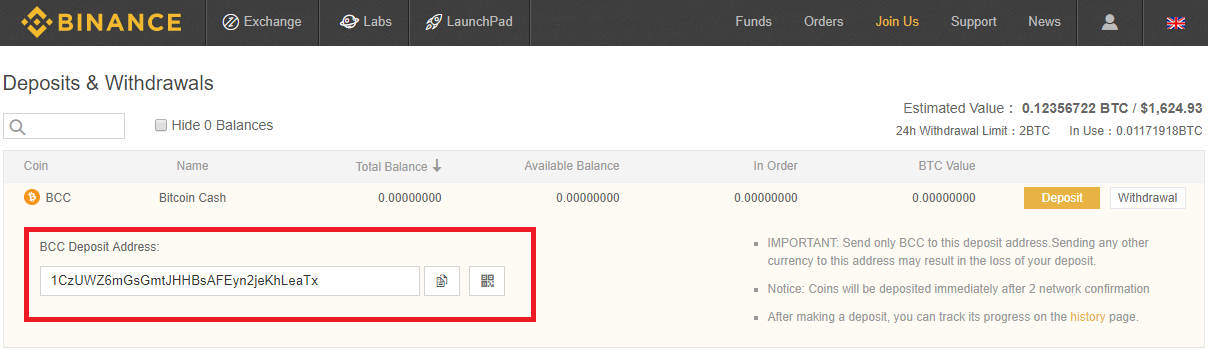

'Deposits & Withdrawals\n\nQ Hide 0 Balances\nCoin Name\n© ece Bitcoin Cash\n\nBCC Deposit Address:\n\n1CZUWZ6mGsGmtJHHBsAFEyn2jeKhLeaTx\n\nTotal Balance +\n\n‘0.00000000\n\nAvailable Balance\n\n‘0.00000000\n\n \n\nEstimated Value : 0.12356722 BTC / $1,624.93.\n24h Withdrawal Limit : 2BTC In Use : 0.011719188TC\n\nIn Order BTC Value\n\n.00000000 .00000000 wWinerawa\n\n= IMPORTANT. Send only BCC to this deposit address. Sending any other\ncurrency to this address may result in the loss of your deposit.\n\n= Notice: Coins will be deposited immediately after 2 network confirmation\n\n= After making a deposit, you can track its progress on the history page.'

In [30]:
file = random.choice(files)
result = pytesseract.image_to_string(file)
display(Image.open(file), result)

In [59]:
data = pytesseract.image_to_data(file)

In [70]:
io_data = StringIO(data)
df = pd.read_csv(io_data, sep='\t')

In [75]:
df.sort_values('conf', ascending=False)

,level,page_num,block_num,par_num,line_num,word_num,left,top,width,height,conf,text
102,5,1,14,1,1,8,964,238,38,11,96,deposit
132,5,1,15,1,1,10,1040,284,41,9,96,network
131,5,1,15,1,1,9,1030,284,5,9,96,2
62,5,1,11,1,1,1,904,103,61,10,96,Estimated
127,5,1,15,1,1,5,863,284,12,9,96,be
...,...,...,...,...,...,...,...,...,...,...,...,...
48,4,1,8,1,1,0,525,161,94,9,-1,NaN
47,3,1,8,1,0,0,525,161,94,9,-1,NaN
46,2,1,8,0,0,0,525,161,94,9,-1,NaN
120,2,1,15,0,0,0,754,284,395,11,-1,NaN


In [48]:
addresses = re.findall(r'^[13][a-km-zA-HJ-NP-Z1-9]{25,34}$', result, re.MULTILINE)
addresses

['1CZUWZ6mGsGmtJHHBsAFEyn2jeKhLeaTx']